In [ ]:
import cv2

from matplotlib import pyplot as plt


import csv

import numpy as np

from PIL import Image as im

from skimage.metrics import structural_similarity as ssim


Extracting data from the mnist data set csv file and converting it into a image

In [ ]:

with open('sample_data/mnist_test.csv', mode ='r') as file:

  csvFile = csv.reader(file)
  lst = []
  for lines in csvFile:
    lst = lines
    break

num = int(lst[0])

lst = lst[1:]

lst = [int(i) for i in lst]


Converting the above extracted image into a size of 32x32

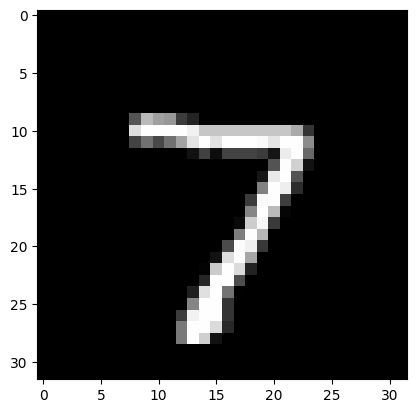

In [ ]:

lst1 = []

for i in range(0,32):
  tmp = []
  for j in range(0,32):
    if(i > 1 and i < 30 and j > 1 and j < 30):
      tmp.append(lst[(i-2)*28+(j-2)])
    else:
      tmp.append(0)
  lst1.append(tmp)


lst3 = np.array(lst1, dtype=np.int16)
lst1 = np.array(lst1, dtype=np.uint16)
lst11 = np.array(lst1, dtype=np.uint8)


lst2 = lst1.reshape((32,32,1))


plt.imshow(lst2, cmap='gray')
plt.show()


Saving the input image

In [ ]:
data = im.fromarray(lst11)
data.save('seven.png')

Writing input data into a txt file in the 8-bit binary format

In [ ]:
with open('seven_uint8.txt', 'w') as f:
  for i in range(32):
    for j in range(32):
      bin = str(format(lst1[i,j],'b'))
      bin = (8-len(bin))*'0' + bin + '\n'
      f.write(bin)

Convoluting the input image with the averaging Kernel

(32, 32)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 84 185 159 151 60 36 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 222 254 254 254 254 241 198 198 198 198 198 198 198 198 170 52 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 67 114 72 114 163 227 254 225 254 254 254 250 229 254 254 140 0 0 0 0 0 0 0 0  
0 0 0 0 0

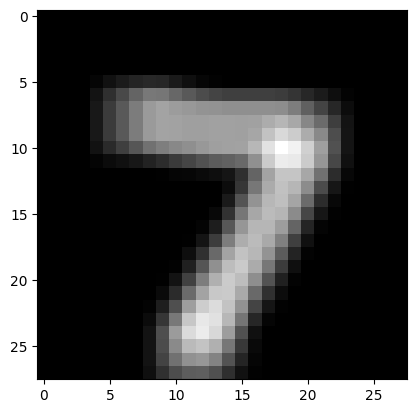

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0   84  269  428  579  639  591  406  247   96   36
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  306  745 1158 1563 1877 1848 1607 1392 1185 1069
   990  990  990  990  962  816  618  420  222   52    0  

In [ ]:
kernel1 = np.ones((5, 5), np.uint8)

# Applying the filter2D() function
img = cv2.filter2D(src=lst1, ddepth=-1, kernel=kernel1)

print(img.shape)
print(np.array(lst1))
for k in lst1:
  for j in k:
    print(j, end=" ")
    # print(" ",end="")
  print(" ", end="\n")

output_size = 28
output_start = (5 - 1) // 2  # Adjust for odd-sized kernel
img_filtered = img[output_start:output_start + output_size, output_start:output_start + output_size].astype(lst1.dtype)


plt.imshow(img_filtered , cmap='gray')
plt.show()
# plt.savefig('seven_1.png')

print(img_filtered)


Extracting the output image data from a txt file generated in Vivado

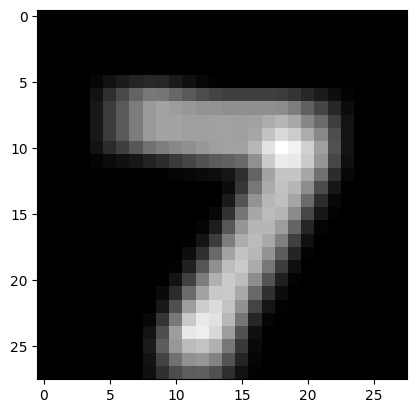

In [ ]:
out_avg_fil = np.zeros((28,28), dtype=np.uint16)

def bintoint(line):
  tmp = 0
  for i in range(0,16):
    if(line[i] == '1'):
      tmp = tmp + 1
    if(i < 15):
      tmp = tmp * 2
  return tmp

with open('out_img32_ker5_1.txt', 'r') as f:
  for i in range(28):
    for j in range(28):
      if(i==27 and j == 27):
        out_avg_fil[i,j] = 0
      else:
        out_avg_fil[i,j] = bintoint(f.readline())

# print(out_avg_fil)
plt.imshow(out_avg_fil, cmap = 'gray')
plt.show()

Finding the similarity of images using ssim

In [ ]:
similarity_index, _ = ssim(img_filtered, out_avg_fil, full=True)

print(similarity_index)

0.9999638933068133


With sobel left filter

[[255 254   0   2   1]
 [252 248   0   8   4]
 [250 244   0  12   6]
 [252 248   0   8   4]
 [255 254   0   2   1]]
(32, 32)


<ipython-input-16-6907d120f7c6>:4: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  sobel_left_kernel[0,:] =  [-1, -2, 0, 2, 1]
<ipython-input-16-6907d120f7c6>:4: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  sobel_left_kernel[0,:] =  [-1, -2, 0, 2, 1]
<ipython-input-16-6907d120f7c6>:5: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -4 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the des

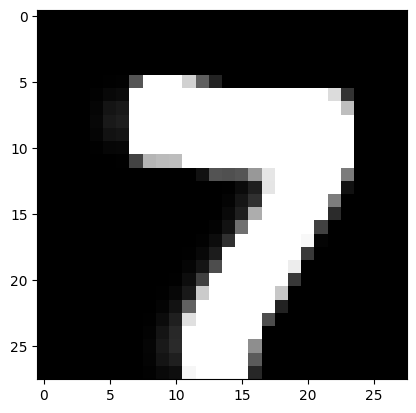

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0    84   353   529 21805 65535 65535 65535 53745
  24444  9180     0     0     0     0     0     0  

In [ ]:
sobel_left_kernel = np.zeros((5,5), dtype = np.uint8)


sobel_left_kernel[0,:] =  [-1, -2, 0, 2, 1]
sobel_left_kernel[1,:] =  [-4, -8, 0, 8, 4]
sobel_left_kernel[2,:] =  [-6, -12, 0, 12, 6]
sobel_left_kernel[3,:] =  [-4, -8, 0, 8, 4]
sobel_left_kernel[4,:] =  [-1, -2, 0, 2, 1]

print(sobel_left_kernel)
# Applying the filter2D() function

img = cv2.filter2D(src=lst1, ddepth=-1, kernel=sobel_left_kernel)

print(img.shape)

output_size = 28
output_start = (5 - 1) // 2  # Adjust for odd-sized kernel
img_filtered_sobel_left = img[output_start:output_start + output_size, output_start:output_start + output_size]

plt.imshow(img_filtered_sobel_left , cmap='gray')
plt.show()

print(img_filtered_sobel_left)


<ipython-input-17-5eaa47c73826>:11: RuntimeWarning: overflow encountered in scalar add
  out1[i,j] = out1[i,j] + ker[4,0] * lst1[i+4,j] + ker[4,1] * lst1[i+4,j+1]+ ker[4,2] * lst1[i+4,j+2]+ ker[4,3] * lst1[i+4,j+3]+ ker[4,4] * lst1[i+4,j+4]
<ipython-input-17-5eaa47c73826>:10: RuntimeWarning: overflow encountered in scalar add
  out1[i,j] = out1[i,j] + ker[3,0] * lst1[i+3,j] + ker[3,1] * lst1[i+3,j+1]+ ker[3,2] * lst1[i+3,j+2]+ ker[3,3] * lst1[i+3,j+3]+ ker[3,4] * lst1[i+3,j+4]
<ipython-input-17-5eaa47c73826>:9: RuntimeWarning: overflow encountered in scalar add
  out1[i,j] = out1[i,j] + ker[2,0] * lst1[i+2,j] + ker[2,1] * lst1[i+2,j+1]+ ker[2,2] * lst1[i+2,j+2]+ ker[2,3] * lst1[i+2,j+3]+ ker[2,4] * lst1[i+2,j+4]
<ipython-input-17-5eaa47c73826>:8: RuntimeWarning: overflow encountered in scalar add
  out1[i,j] = out1[i,j] + ker[1,0] * lst1[i+1,j] + ker[1,1] * lst1[i+1,j+1]+ ker[1,2] * lst1[i+1,j+2]+ ker[1,3] * lst1[i+1,j+3]+ ker[1,4] * lst1[i+1,j+4]
<ipython-input-17-5eaa47c73826>:7: Run

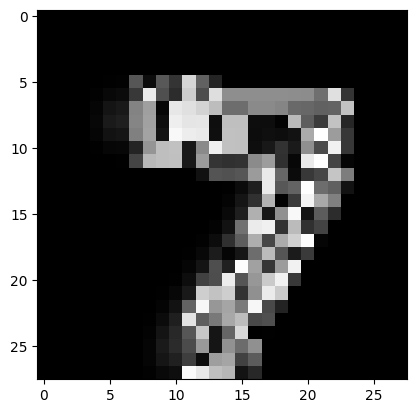

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0    84   353   529 21805  3236 22181 13435 53745
  24444  9180     0     0     0     0     0     0  

In [ ]:

ker = sobel_left_kernel

out1 = np.zeros((28,28), dtype = np.uint16)

for i in range(0,28):
  for j in range(0,28):
    out1[i,j] = ker[0,0] * lst1[i,j] + ker[0,1] * lst1[i,j+1]+ ker[0,2] * lst1[i,j+2]+ ker[0,3] * lst1[i,j+3]+ ker[0,4] * lst1[i,j+4]
    out1[i,j] = out1[i,j] + ker[1,0] * lst1[i+1,j] + ker[1,1] * lst1[i+1,j+1]+ ker[1,2] * lst1[i+1,j+2]+ ker[1,3] * lst1[i+1,j+3]+ ker[1,4] * lst1[i+1,j+4]
    out1[i,j] = out1[i,j] + ker[2,0] * lst1[i+2,j] + ker[2,1] * lst1[i+2,j+1]+ ker[2,2] * lst1[i+2,j+2]+ ker[2,3] * lst1[i+2,j+3]+ ker[2,4] * lst1[i+2,j+4]
    out1[i,j] = out1[i,j] + ker[3,0] * lst1[i+3,j] + ker[3,1] * lst1[i+3,j+1]+ ker[3,2] * lst1[i+3,j+2]+ ker[3,3] * lst1[i+3,j+3]+ ker[3,4] * lst1[i+3,j+4]
    out1[i,j] = out1[i,j] + ker[4,0] * lst1[i+4,j] + ker[4,1] * lst1[i+4,j+1]+ ker[4,2] * lst1[i+4,j+2]+ ker[4,3] * lst1[i+4,j+3]+ ker[4,4] * lst1[i+4,j+4]

plt.imshow(out1 , cmap='gray')
plt.show()

print(out1)

In [ ]:
out_sobel_left = np.zeros((28,28), dtype=np.uint16)

def bintoint(line):
  tmp = 0
  for i in range(0,16):
    if(line[i] == '1'):
      tmp = tmp + 1
    if(i < 15):
      tmp = tmp * 2
  return tmp

with open('seven_sobel_left.txt', 'r') as f:
  for i in range(28):
    for j in range(28):
      if(i==27 and j == 27):
        out_sobel_left[i,j] = 0
      else:
        out_sobel_left[i,j] = bintoint(f.readline())

plt.imshow(out_sobel_left, cmap = 'gray')
plt.show()

# print(out_sobel_left)


FileNotFoundError: [Errno 2] No such file or directory: 'seven_sobel_left.txt'

In [ ]:
similarity_index_sobel_left, _ = ssim(img_filtered_sobel_left, out_sobel_left, full=True)

print(similarity_index_sobel_left)

similarity_index_sobel_left, _ = ssim(out1, out_sobel_left, full=True)

print(similarity_index_sobel_left)